In [2]:
import pandas as pd
import datetime

all_o3_df = pd.read_csv("./Resources/all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./Resources/all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [3]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

shutdown_time_period_pm_df = shutdownData(all_pm25_df, "Manhattan", (3, 22), (6, 8))

#print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

In [4]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
NYC_o3_shutdown_df = shutdownData(all_o3_df, "Manhattan", (3, 22), (6, 8))
NYC_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-22,US,Manhattan,o3,14,2.0,4.0,3.0
2017-01-23,US,Manhattan,o3,13,22.0,28.0,23.0
2017-01-24,US,Manhattan,o3,24,12.0,28.0,23.0
2017-01-25,US,Manhattan,o3,24,3.0,28.0,15.0
2017-01-26,US,Manhattan,o3,24,2.0,25.0,12.0
...,...,...,...,...,...,...,...
2020-06-03,US,Manhattan,o3,24,19.0,45.0,31.0
2020-06-04,US,Manhattan,o3,24,19.0,58.0,36.0
2020-06-05,US,Manhattan,o3,24,15.0,42.0,24.0


In [5]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,84.808511,0.901064,22.894681,6.238298
2018,88.189474,1.137895,27.604211,7.561053
2019,88.378947,0.429474,165.828421,6.428421
2020,50.479167,1.005208,14.467708,5.257292


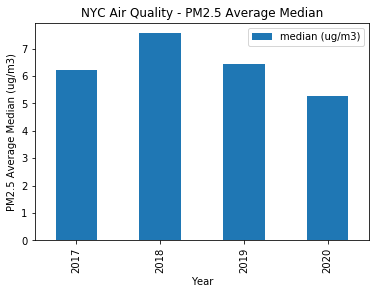

In [6]:
#plot of average medians
bar_plot_axes = bar_plot_info.plot(kind="bar", y="median (ug/m3)")

#set titles, axes labels
bar_plot_axes.set_title("NYC Air Quality - PM2.5 Average Median")
bar_plot_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
bar_plot_axes.set_xlabel("Year")

bar_plot_axes.get_figure().savefig("./outputs/NYC/NYC_pm25median.png")

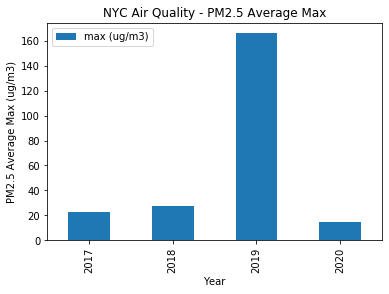

In [9]:
#plot of average maximums
bar_plot_2_axes = bar_plot_info.plot(kind="bar", y="max (ug/m3)")

#set titles, axes labels
bar_plot_2_axes.set_title("NYC Air Quality - PM2.5 Average Max")
bar_plot_2_axes.set_ylabel("PM2.5 Average Max (ug/m3)")
bar_plot_2_axes.set_xlabel("Year")

bar_plot_2_axes.get_figure().savefig("./outputs/NYC/NYC_pm25max.png")

In [10]:
#get percentage decrease year over year
bar_plot_info.pct_change()

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,NaN,NaN,NaN,NaN
2018,0.039866,0.262835,0.205704,0.212038
2019,0.002148,-0.622572,5.007360,-0.149798
2020,-0.428833,1.340559,-0.912755,-0.182180


In [11]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             87.125644
min (ug/m3)        0.822811
max (ug/m3)       72.109104
median (ug/m3)     6.742591
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,-0.220286


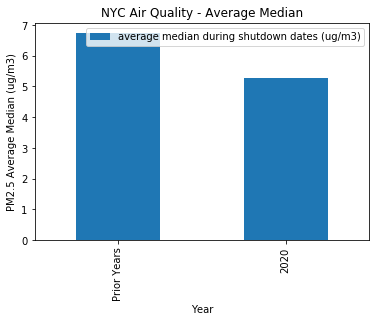

In [18]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_axes = summary_bar_plot.plot(kind="bar")


#set titles, axes labels
summary_axes.set_title("NYC Air Quality - Average Median")
summary_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
summary_axes.set_xlabel("Year")

summary_axes.get_figure().savefig("./outputs/NYC/NYC_3yearmedianchange.png")

summary_bar_plot.pct_change()

In [19]:
#look at o3 values for wuhan for the same time period by year
NYC_avg_o3_df = NYC_o3_shutdown_df.groupby(NYC_o3_shutdown_df.index.year).mean()
NYC_avg_o3_df

,count,min (ppb),max (ppb),median (ppb)
Date,,,,
2017,22.633333,13.033333,33.800000,25.066667
2018,26.410526,9.094737,36.105263,24.042105
2019,30.126316,11.031579,531.105263,28.652632
2020,23.072917,15.260417,34.666667,25.739583


In [20]:
#combine three previous years into an average median value
prior_years_o3_df = NYC_avg_o3_df.loc[NYC_avg_o3_df.index<2020]
prior_o3_averages = prior_years_o3_df.mean()
prior_o3_averages

count            26.390058
min (ppb)        11.053216
max (ppb)       200.336842
median (ppb)     25.920468
dtype: float64

,average median during shutdown dates (ppb)
Prior Years,NaN
2020,-0.006978


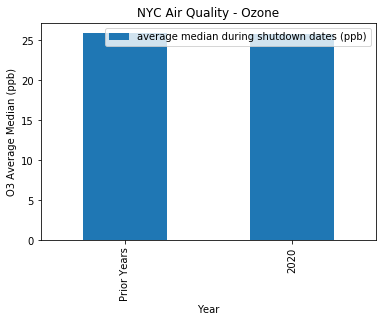

In [21]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ppb)":[prior_o3_averages["median (ppb)"], 
                                                                                 NYC_avg_o3_df["median (ppb)"][2020]]}, 
                                index=["Prior Years", "2020"])

o3_axes = summary_bar_plot.plot(kind="bar")

#set titles, axes labels
o3_axes.set_title("NYC Air Quality - Ozone")
o3_axes.set_ylabel("O3 Average Median (ppb)")
o3_axes.set_xlabel("Year")

o3_axes.get_figure().savefig("./outputs/NYC/NYC_3yearmedianchange_o3.png")

summary_bar_plot.pct_change()

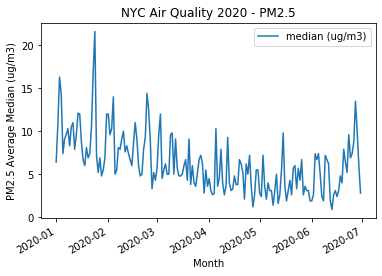

In [23]:
NYC_2020_pm25_df = all_pm25_df.loc[(all_pm25_df.index.year == 2020) & (all_pm25_df["City"] == "Manhattan")]
NYC_line_axes = NYC_2020_pm25_df.plot(kind="line", y="median (ug/m3)")

#set titles, axes labels
NYC_line_axes.set_title("NYC Air Quality 2020 - PM2.5")
NYC_line_axes.set_ylabel("PM2.5 Average Median (ug/m3)")
NYC_line_axes.set_xlabel("Month")

NYC_line_axes.get_figure().savefig("./outputs/NYC/NYC_2020_line_plot.png")